In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from deepshape.surfaces import * 
import numpy as np
import matplotlib.pyplot as plt 

In [4]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import MDS
from sklearn_extra.cluster import KMedoids

from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix

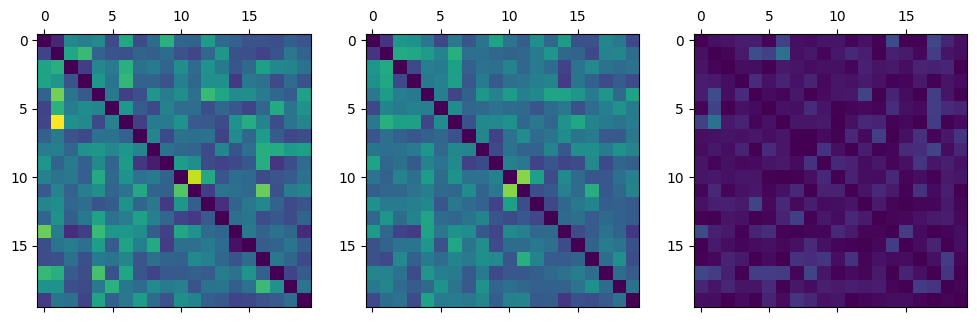

[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9]


In [23]:
D, y = load_distance_matrix("distance_matrix.pickle")
D /= D.max()
plot_distance_matrix(D)
S, A = symmetric_part(D), antisymmetric_part(D)

# Create label list, as they were not stored with matrix.
y = []
for i in range(10):
    y.extend([i, i])
print(y)

In [14]:
X1 = mds(S)
y1 = agglomerative_clustering(S)
X2 = KMedoids(metric='precomputed', method='pam').fit_transform(S)
y2 = KMedoids(metric='precomputed', method='pam').fit_predict(S)

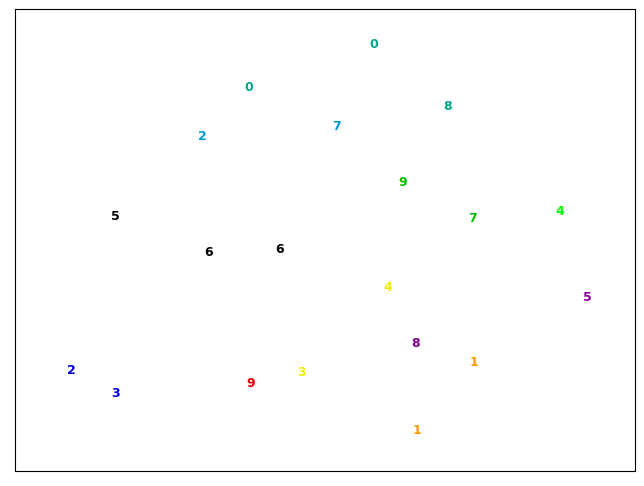

In [15]:
plot_clustering(X1, y, y1)

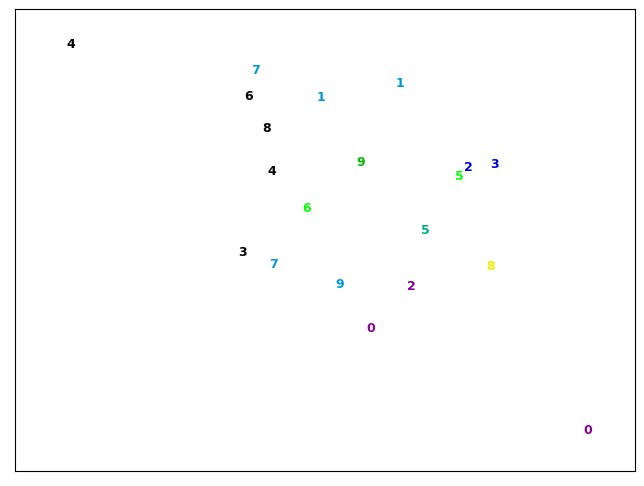

In [16]:
plot_clustering(X2, y, y2)

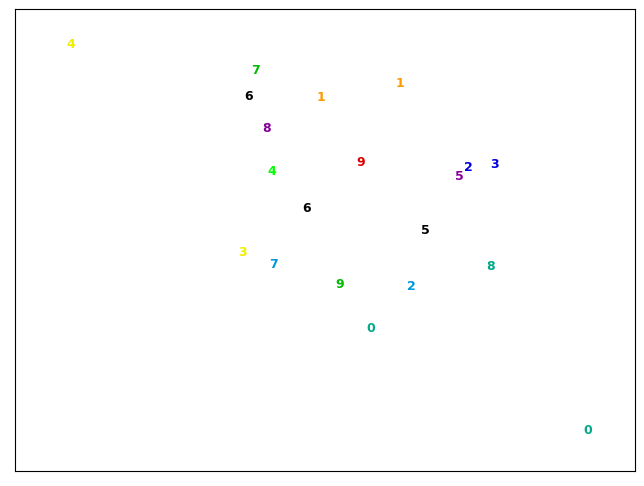

In [17]:
plot_clustering(X2, y, y1)

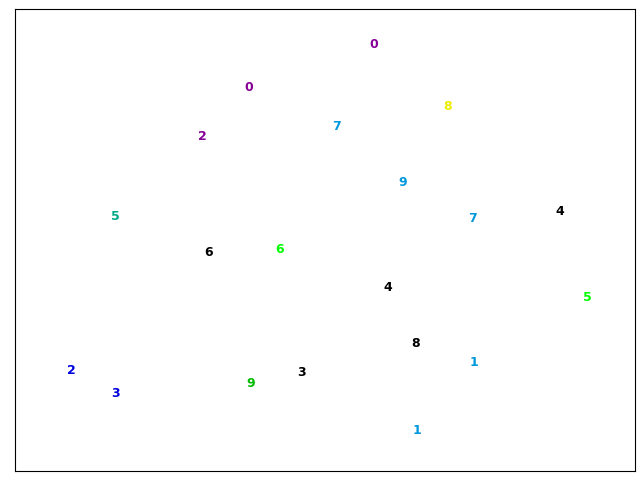

In [18]:
plot_clustering(X1, y, y2)